# Results presentation

This notebook creates the plots of results used in the final report, based on the result files from the *results* subfolder.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Overall sentiment analysis on Amazon Electronics

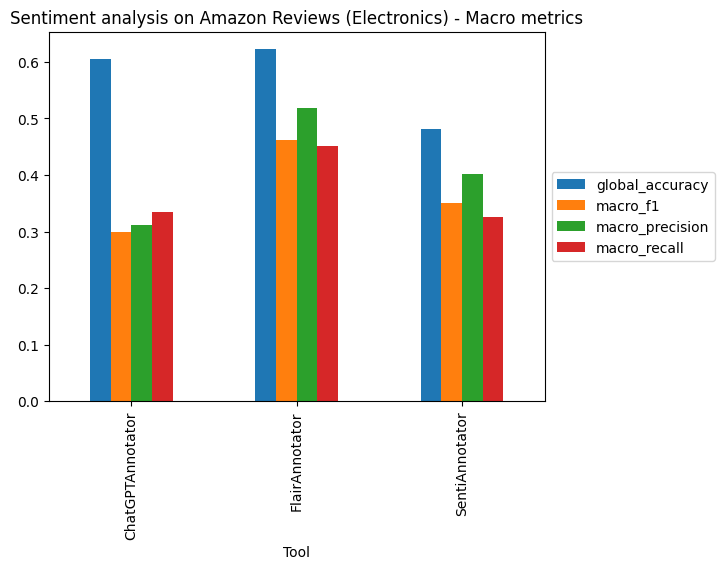

In [18]:
results = pd.read_csv('results/results_amazon_5000.csv', index_col=0)
results = results[results["Statistic"].isin(['global_accuracy', 'macro_precision', 'macro_recall', 'macro_f1'])]
results['Value'] = results['Value'].astype(float)
results_pivot = results.pivot(index='Name', columns='Statistic', values='Value')
ax = results_pivot.plot.bar(title = "Sentiment analysis on Amazon Reviews (Electronics) - Macro metrics", xlabel="Tool")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

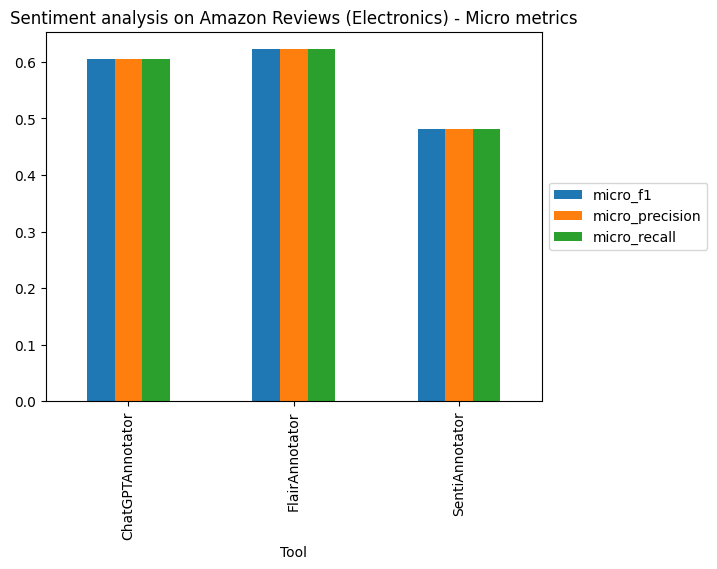

In [19]:
results = pd.read_csv('results/results_amazon_5000.csv', index_col=0)
results = results[results["Statistic"].isin(['micro_precision', 'micro_recall', 'micro_f1'])]
results['Value'] = results['Value'].astype(float)
results_pivot = results.pivot(index='Name', columns='Statistic', values='Value')
ax = results_pivot.plot.bar(title = "Sentiment analysis on Amazon Reviews (Electronics) - Micro metrics", xlabel="Tool")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

## Aspect based sentiment analysis on SemEval

### Laptops subset

In [3]:
laptops_results = pd.read_csv('results/results_laptops_5000.csv', index_col=0)
laptops_results = laptops_results[laptops_results["Statistic"]!="name"]
laptops_results['Value'] = laptops_results['Value'].astype(float).round(2)

In [23]:
laptops_confusion_matrix_possible= laptops_results[laptops_results["Statistic"].isin(['correct', 'incorrect', 'partial', 'missing'])]
laptops_confusion_matrix_possible = laptops_confusion_matrix_possible.pivot(index='Name', columns='Statistic')
laptops_confusion_matrix_possible = laptops_confusion_matrix_possible['Value'].reset_index()
laptops_confusion_matrix_possible.set_index('Name', inplace=True)
laptops_confusion_matrix_possible.columns.name = None
laptops_confusion_matrix_possible

,correct,incorrect,missing,partial
Name,,,,
PyabsaExtractor + FlairClassifier,1303.0,737.0,200.0,118.0
PyabsaExtractor + SentiClassifier,1029.0,1034.0,200.0,95.0
PyabsaExtrassifier,1874.0,93.0,200.0,191.0
SpacyExtractor + FlairClassifier,263.0,169.0,1731.0,195.0
SpacyExtractor + SentiClassifier,202.0,276.0,1731.0,149.0


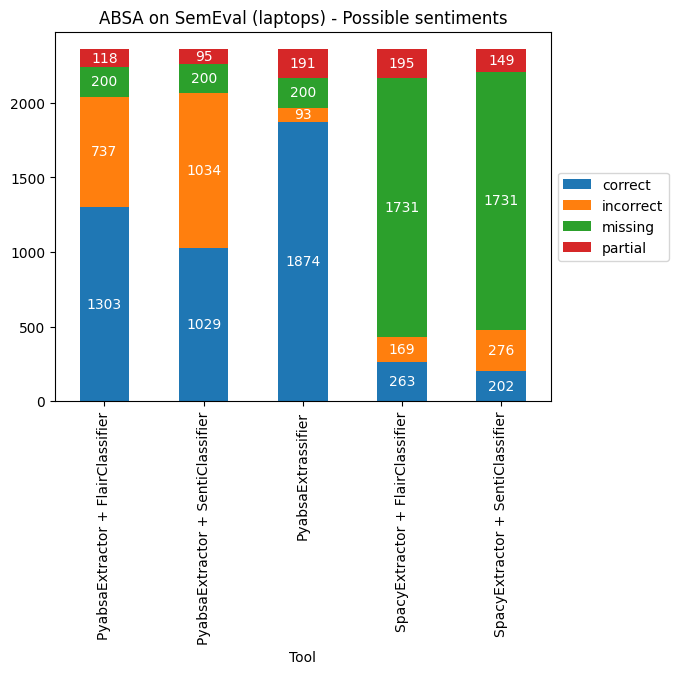

In [24]:
ax = laptops_confusion_matrix_possible.plot.bar(stacked=True, title = "ABSA on SemEval (laptops) - Possible sentiments", xlabel="Tool")
labels = [f'{int(i)}' for i in laptops_confusion_matrix_possible.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [25]:
laptops_confusion_matrix_actual = laptops_results[laptops_results["Statistic"].isin(['correct', 'incorrect', 'partial', 'spurious'])]
laptops_confusion_matrix_actual = laptops_confusion_matrix_actual.pivot(index='Name', columns='Statistic')
laptops_confusion_matrix_actual = laptops_confusion_matrix_actual['Value'].reset_index()
laptops_confusion_matrix_actual.set_index('Name', inplace=True)
laptops_confusion_matrix_actual.columns.name = None
laptops_confusion_matrix_actual

,correct,incorrect,partial,spurious
Name,,,,
PyabsaExtractor + FlairClassifier,1303.0,737.0,118.0,268.0
PyabsaExtractor + SentiClassifier,1029.0,1034.0,95.0,268.0
PyabsaExtrassifier,1874.0,93.0,191.0,268.0
SpacyExtractor + FlairClassifier,263.0,169.0,195.0,1210.0
SpacyExtractor + SentiClassifier,202.0,276.0,149.0,1210.0


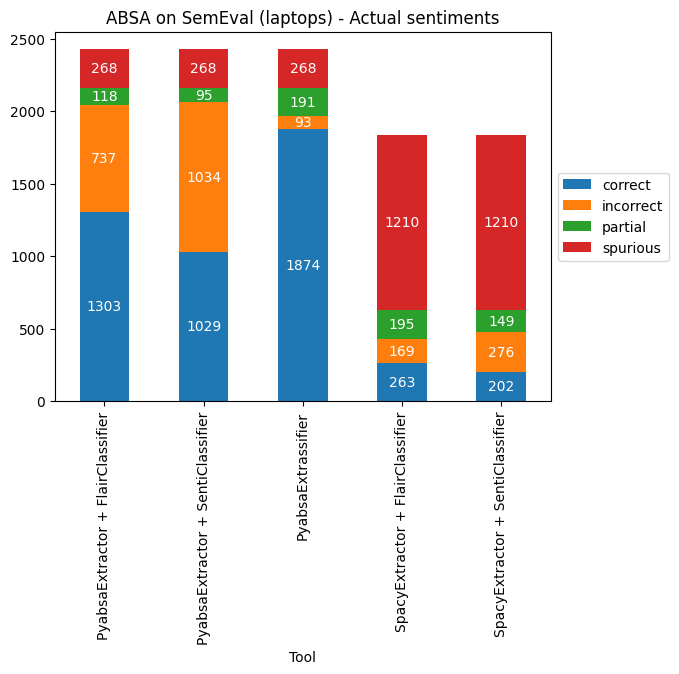

In [27]:
ax = laptops_confusion_matrix_actual.plot.bar(stacked=True, title = "ABSA on SemEval (laptops) - Actual sentiments", xlabel="Tool")
labels = [f'{int(i)}' for i in laptops_confusion_matrix_actual.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [28]:
laptops_metrics= laptops_results[laptops_results["Statistic"].isin(['precision', 'recall', 'f1'])]
laptops_metrics = laptops_metrics.pivot(index='Name', columns='Statistic')
laptops_metrics = laptops_metrics['Value'].reset_index()
laptops_metrics.set_index('Name', inplace=True)
laptops_metrics.columns.name = None
laptops_metrics

,f1,precision,recall
Name,,,
PyabsaExtractor + FlairClassifier,0.54,0.54,0.55
PyabsaExtractor + SentiClassifier,0.43,0.42,0.44
PyabsaExtrassifier,0.78,0.77,0.79
SpacyExtractor + FlairClassifier,0.13,0.14,0.11
SpacyExtractor + SentiClassifier,0.10,0.11,0.09


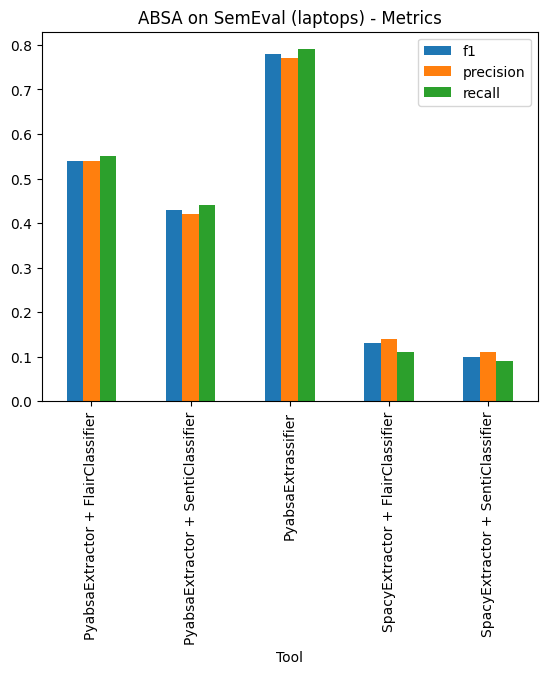

In [30]:
ax = laptops_metrics.plot.bar(title = "ABSA on SemEval (laptops) - Metrics", xlabel="Tool")

### Restaurants subset

In [31]:
restaurants_results = pd.read_csv('results/results_restaurants_5000.csv', index_col=0)
restaurants_results = restaurants_results[restaurants_results["Statistic"]!="name"]
restaurants_results['Value'] = restaurants_results['Value'].astype(float).round(2)

In [32]:
restaurants_confusion_matrix_possible = restaurants_results[restaurants_results["Statistic"].isin(['correct', 'incorrect', 'partial', 'missing'])]
restaurants_confusion_matrix_possible = restaurants_confusion_matrix_possible.pivot(index='Name', columns='Statistic')
restaurants_confusion_matrix_possible = restaurants_confusion_matrix_possible['Value'].reset_index()
restaurants_confusion_matrix_possible.set_index('Name', inplace=True)
restaurants_confusion_matrix_possible.columns.name = None
restaurants_confusion_matrix_possible

,correct,incorrect,missing,partial
Name,,,,
PyabsaExtractor + FlairClassifier,2156.0,1120.0,196.0,221.0
PyabsaExtractor + SentiClassifier,2010.0,1253.0,196.0,234.0
PyabsaExtrassifier,2898.0,301.0,196.0,298.0
SpacyExtractor + FlairClassifier,723.0,330.0,2437.0,203.0
SpacyExtractor + SentiClassifier,661.0,398.0,2437.0,197.0


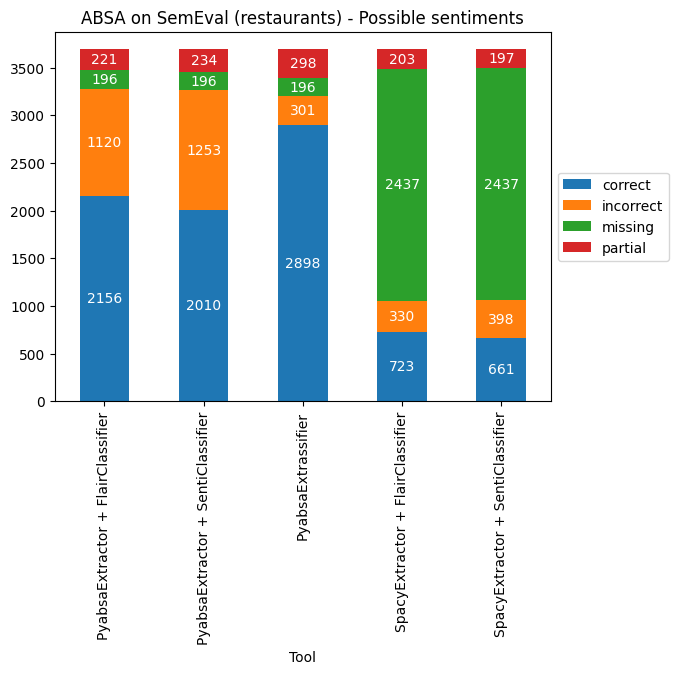

In [33]:
ax = restaurants_confusion_matrix_possible.plot.bar(stacked=True, title="ABSA on SemEval (restaurants) - Possible sentiments", xlabel="Tool")
labels = [f'{int(i)}' for i in restaurants_confusion_matrix_possible.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [34]:
restaurants_confusion_matrix_actual = restaurants_results[restaurants_results["Statistic"].isin(['correct', 'incorrect', 'partial', 'spurious'])]
restaurants_confusion_matrix_actual = restaurants_confusion_matrix_actual.pivot(index='Name', columns='Statistic')
restaurants_confusion_matrix_actual = restaurants_confusion_matrix_actual['Value'].reset_index()
restaurants_confusion_matrix_actual.set_index('Name', inplace=True)
restaurants_confusion_matrix_actual.columns.name = None
restaurants_confusion_matrix_actual

,correct,incorrect,partial,spurious
Name,,,,
PyabsaExtractor + FlairClassifier,2156.0,1120.0,221.0,269.0
PyabsaExtractor + SentiClassifier,2010.0,1253.0,234.0,269.0
PyabsaExtrassifier,2898.0,301.0,298.0,269.0
SpacyExtractor + FlairClassifier,723.0,330.0,203.0,1313.0
SpacyExtractor + SentiClassifier,661.0,398.0,197.0,1313.0


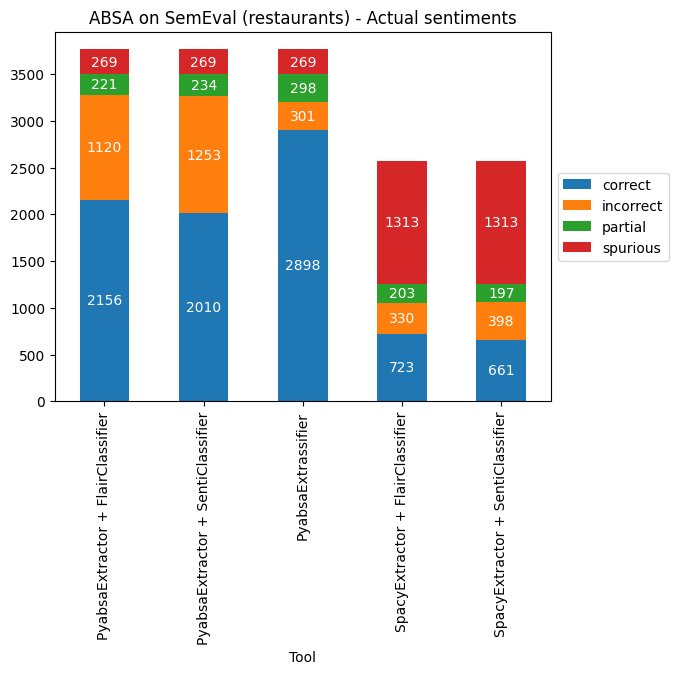

In [35]:
ax = restaurants_confusion_matrix_actual.plot.bar(stacked=True, title="ABSA on SemEval (restaurants) - Actual sentiments", xlabel="Tool")
labels = [f'{int(i)}' for i in restaurants_confusion_matrix_actual.to_numpy().flatten(order='F')]

for i, patch in enumerate(ax.patches):
    x, y = patch.get_xy()
    x += patch.get_width() / 2
    y += patch.get_height() / 2
    ax.annotate(labels[i], (x, y), ha='center', va='center', c='white')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [36]:
restaurants_metrics = restaurants_results[restaurants_results["Statistic"].isin(['precision', 'recall', 'f1'])]
restaurants_metrics = restaurants_metrics.pivot(index='Name', columns='Statistic')
restaurants_metrics = restaurants_metrics['Value'].reset_index()
restaurants_metrics.set_index('Name', inplace=True)
restaurants_metrics.columns.name = None
restaurants_metrics

,f1,precision,recall
Name,,,
PyabsaExtractor + FlairClassifier,0.58,0.57,0.58
PyabsaExtractor + SentiClassifier,0.54,0.53,0.54
PyabsaExtrassifier,0.78,0.77,0.78
SpacyExtractor + FlairClassifier,0.23,0.28,0.20
SpacyExtractor + SentiClassifier,0.21,0.26,0.18


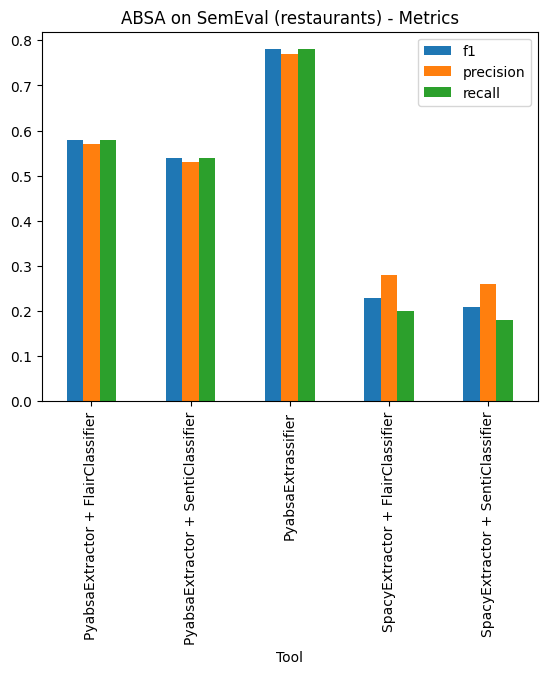

In [37]:
ax = restaurants_metrics.plot.bar(title="ABSA on SemEval (restaurants) - Metrics", xlabel="Tool")